<a href="https://colab.research.google.com/github/Suarenz/CSST101-CS3B/blob/main/3B_CALAPAO_EXER4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1: Setting Up the Environment

In [31]:
!pip install pgmpy

In [32]:
import numpy as np
import pandas as pd
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination
from pgmpy.inference import BeliefPropagation
from pgmpy.factors.discrete import TabularCPD

# Exercise 2: Building a Simple Bayesian Network

In [28]:
model = BayesianModel([('Weather', 'Traffic',),('Traffic', 'Late')])

In [33]:
cpd_weather = TabularCPD(variable='Weather', variable_card=2, values=[[0.8], [0.2]])

cpd_traffic = TabularCPD(variable='Traffic', variable_card=2,
                         values=[[0.9, 0.5],
                                 [0.1, 0.5]],
                         evidence=['Weather'],
                         evidence_card=[2])


cpd_late = TabularCPD(variable='Late', variable_card=2,
                     values=[[0.95, 0.4],
                             [0.05, 0.6]],
                     evidence=['Traffic'],
                     evidence_card=[2])
model.add_cpds(cpd_weather, cpd_traffic, cpd_late)

assert model.check_model()

inference = VariableElimination(model)

# Exercise 3: Querying the Bayesian Network

In [34]:
result = inference.query(variables=['Late'], evidence={'Weather': 1})
print(result)

+---------+-------------+
| Late    |   phi(Late) |
+=========+=============+
| Late(0) |      0.6750 |
+---------+-------------+
| Late(1) |      0.3250 |
+---------+-------------+


# Exercise 4: Parameter Learning

In [5]:
import pandas as pd
import numpy as np

In [6]:
data = pd.DataFrame({
    'Weather': np.random.choice([0,1], size=1000, p=[0.8, 0.2]),
    'Traffic': np.nan,
    'Late': np.nan
})

data.loc[data['Weather']== 0, 'Traffic'] = np.random.choice(
    [0,1],
    size=data[data['Weather'] == 0].shape[0],
    p=[0.9, 0.1]
)

data.loc[data['Weather'] == 1, 'Traffic'] = np.random.choice(
    [0,1],
    size=data[data['Weather'] == 1].shape[0],
    p=[0.5, 0.5]
)
data['Late'] = np.where(
        data['Traffic'] == 0,
        np.random.choice([0,1], size=data.shape[0], p=[0.95, 0.05]),
        np.random.choice([0,1], size=data.shape[0], p=[0.4, 0.6])
)

In [10]:
pip install pgmpy

In [12]:
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.models import BayesianModel

In [13]:
model = BayesianModel([('Weather', 'Traffic'), ('Traffic', 'Late')])
model.fit(data, estimator=MaximumLikelihoodEstimator)

for cpd in model.get_cpds():
  print(cpd)

+------------+------+
| Weather(0) | 0.81 |
+------------+------+
| Weather(1) | 0.19 |
+------------+------+
+--------------+---------------------+--------------------+
| Weather      | Weather(0)          | Weather(1)         |
+--------------+---------------------+--------------------+
| Traffic(0.0) | 0.9074074074074074  | 0.5210526315789473 |
+--------------+---------------------+--------------------+
| Traffic(1.0) | 0.09259259259259259 | 0.4789473684210526 |
+--------------+---------------------+--------------------+
+---------+----------------------+--------------------+
| Traffic | Traffic(0.0)         | Traffic(1.0)       |
+---------+----------------------+--------------------+
| Late(0) | 0.9532374100719424   | 0.3614457831325301 |
+---------+----------------------+--------------------+
| Late(1) | 0.046762589928057555 | 0.6385542168674698 |
+---------+----------------------+--------------------+


# Exercise 5: Visualizing the Bayesian Network

In [24]:
pip install matplotlib

In [25]:
pip install matplotlib networkx

In [38]:
import pandas as pd
import numpy as np
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator
import matplotlib.pyplot as plt
import networkx as nx

In [40]:
model = BayesianModel([('Weather', 'Traffic'), ('Traffic', 'Late')])
model.fit(data, estimator=MaximumLikelihoodEstimator)

In [42]:
nx_graph = nx.DiGraph(model.edges())

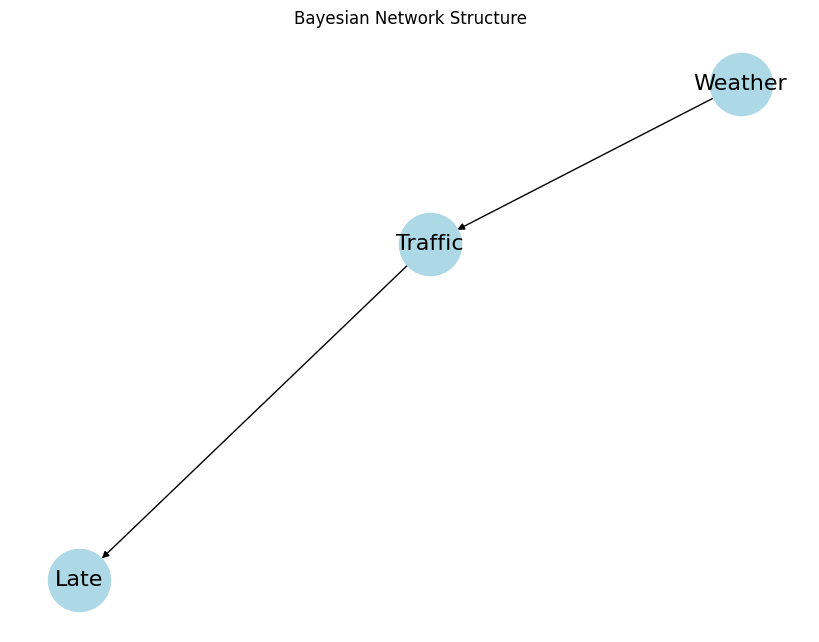

In [44]:
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(nx_graph)  # positions for all nodes
nx.draw(
    nx_graph,
    pos,
    with_labels=True,
    node_size=2000,
    node_color='lightblue',
    font_size=16,
    arrows=True  # Add arrows to indicate directionality
)
plt.title('Bayesian Network Structure')
plt.show()